# <center> The Iris dataset</center>

Le dataset contient 3 types d'Iris : Setosa, Versicolour, and Virginica.

Les lignes étant les échantillons et les colonnes étant : la longueur des sépales, la largeur des sépales, la longueur des pétales et la largeur des pétales.



<h1>1. Import des librairies</h1>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

<h1> 2. Chargement du dataset </h1>

In [2]:
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df['class'] = iris_df['class'].replace([0], 'Iris-virginica')
iris_df['class'] = iris_df['class'].replace([1], 'Iris-versicolor')
iris_df['class'] = iris_df['class'].replace([2], 'Iris-setosa')
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-virginica


In [3]:
# Statistique sur le dataset
iris_df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Pour voir les informations générales sur le dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h1> 3. Preprocessing du dataset </h1>

In [5]:
# Voir les données s'ils contiennent des valeurs null
iris_df.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

<h1> 4. Exploration du dataset </h1>

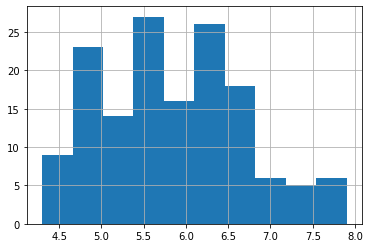

In [6]:
iris_df['sepal_len'].hist()

Par exemple : il y a plus de 25 valeurs d'Iris qui ont une longueur de sépale supérieure à 5,5.

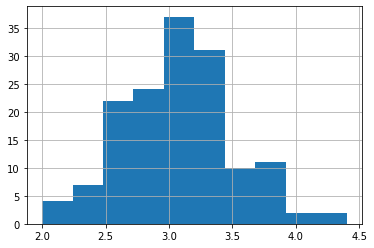

In [7]:
iris_df['sepal_wid'].hist()

In [8]:
#scatterplot

colors = ['red', 'blue', 'green']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

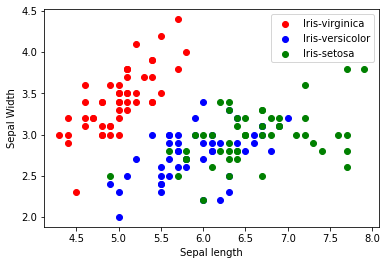

In [9]:
for i in range(3):
    x = iris_df[iris_df['class'] == species[i]]
    plt.scatter(x['sepal_len'], x['sepal_wid'], c = colors[i], label = species[i])

plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.legend()

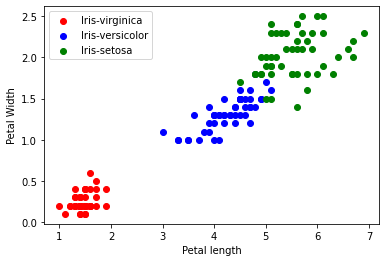

In [10]:
for i in range(3):
    x = iris_df[iris_df['class'] == species[i]]
    plt.scatter(x['petal_len'], x['petal_wid'], c = colors[i], label = species[i])

plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend()

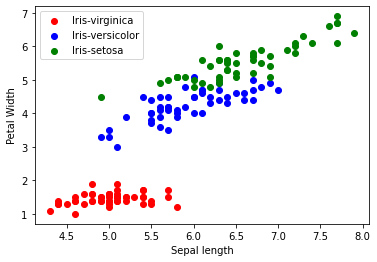

In [11]:
for i in range(3):
    x = iris_df[iris_df['class'] == species[i]]
    plt.scatter(x['sepal_len'], x['petal_len'], c = colors[i], label = species[i])

plt.xlabel('Sepal length')
plt.ylabel('Petal Width')
plt.legend()

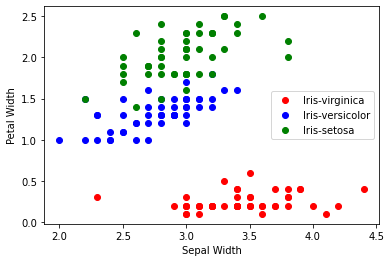

In [12]:
for i in range(3):
    x = iris_df[iris_df['class'] == species[i]]
    plt.scatter(x['sepal_wid'], x['petal_wid'], c = colors[i], label = species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

On voit bien une différence de taille de pétales et sépales en fonction de la longueur et de la largeur afin de différencier les types d'Iris.

<h2> Matrice de corrélation </h2>

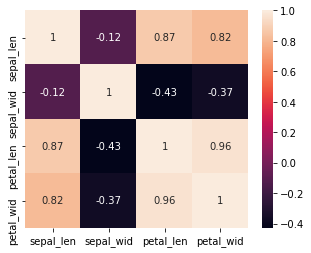

In [13]:
corr = iris_df.corr()

fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot=True, ax=ax)

La longueur des pétales (petal_len) et la largeur de pétales (petal_wid) sont fortement corrélées, avec un score de corrélation de 0.96. <br>
La longueur de pétales (petal_len) et la longueur de sépales (sepal_len) sont également très corrélées, avec un score de corrélation de 0.87.

# 5. Encodage des données


C'est le processus de convertir des données non numériques, telles que des textes ou des catégories, en un format numérique pouvant être utilisé par un modèle d'apprentissage automatique. 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

iris_df['class'] = le.fit_transform(iris_df['class'])
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


# 6. Entrainement du modèle

In [16]:
from sklearn.model_selection import train_test_split

X = iris_df.drop(columns=['class'])
Y = iris_df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Logistique Régression

Nous avons un problème de classification, les données qui sont labellisées, ce modèle permet de donner la probabilité qu'un événement appartient à l'une des deux classes possibles.

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  0.9666666666666667


### K-nearest neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [21]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  0.9666666666666667


### Decision Tree Learning

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [24]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  0.9
